#### **Q6.** Alternative ways to represent input images as vectors

In question 1 earlier, we see that the alternative ways to represent the input images a vectors include using (1) the mean and standard deviation of the color channel (2) color histogram, where the second option has a few sub-variations, but we shall consider only the 3D histogram which is what was used in the earlier questions.

On the surface, it seems like using the pixels to represent images may seem like a good idea as there is little loss of the information, compared to using (1) which gives a point estimate and variance of the image, which is not descriptive enough of the image as much of the information is lost. However, if we use the pixel values from the input images, each image is represented by a `(3072,)` vector; which is a high dimensional input which our simple model  might not be able to handle. 

By considering using the 3D histogram features, we reducing the dimensions of the features that is fed to our model but at the same time, we reduce the loss of information. The 3D histogram describes the joint distribution of the red, blue and green values for different intervals, depending on the number of bins choosen to generate the historgram. In my implementation, 8 bins were chosen, thus each bin is of interval size 32 and reduces the dimensions of the features to 512, much managable than the pixel values. The information loss is also reduced as it sorts the pixels into the different bins, which gives us the distrbution of the pixels with respect to the red, blue, green levels.

Thus we observe the following when we use the 3D histogram feature when compared against the pixel features:

- Q2 (logistic loss): Test accuracy improved from 50% to 57.5%

- Q3 (hinge loss): Test accuracy improved from 55% to 67.5%

- Q4 (k nearest neighbors): Test accuracy dropped from 47.5% to 42.5%


#### **Q7.** Training using augmented dataset

Using Google image search, 20 images from each class was added to the original training set, increasing the size of training set 
to be twice larger than the initial. As the new images added to the training set is not of the same dimensions as the original images, we cannot use the pixel values as the features. The features from the 3D histogram will be used as the features. As we are doing a multi-class classification, the one-vs-all approach like in question 5 will be used here.

In [1]:
import cv2
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from utils import *
%matplotlib inline

In [2]:
folders = ['bird', 'cat','airplane','automobile']
aug_path_list = []
test_path_list = []
aug_dir = 'C:/Users/zlai/Documents/repo/HomeworkTex/ML/hw/homework 1/data/aug/'
test_dir = 'C:/Users/zlai/Documents/repo/HomeworkTex/ML/hw/homework 1/data/test/'


for folder in folders:
    l_aug = aug_dir + folder 
    l_test = test_dir + folder
    aug_path_list.append(l_aug)
    test_path_list.append(l_test)



In [3]:
# loading histogram features
x_train, y_train = load_data(aug_path_list, feature = None)
x_test, y_test = load_data(test_path_list, feature = None)

In [4]:
# x_train = x_train/1024
# x_test = x_test/1024

In [5]:
# adding of biases
x_train = add_bias(x_train)
x_test = add_bias(x_test)

In [6]:
print (x_train.shape, 'train set')
print (x_test.shape, 'test set')

(160, 513) train set
(80, 513) test set


In [7]:
W = initialize_params(size=x_train.shape[1], seed=123)
learnt_W_history_list = onevsall_train(x_train, y_train, x_test, y_test, W, epoch = 100, batch_size=4)

C:\Users\zlai\Documents\repo\HomeworkTeX\ML\hw\utils.py:126: RuntimeWarning: divide by zero encountered in log
  return -np.mean(np.log(h))


Epoch with minimum change in parameter: 97 
Epoch with minimum change in parameter: 96 
Epoch with minimum change in parameter: 97 
Epoch with minimum change in parameter: 89 


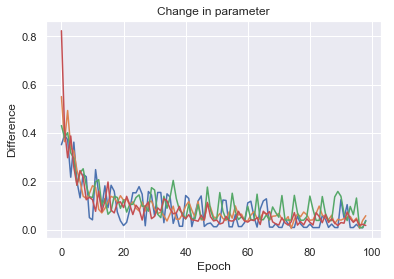

In [8]:
for i in range(4):
    para_diff(learnt_W_history_list[i])

In [9]:
predict_epoch_train = onevsall_predict(x_train, learnt_W_history_list)
acc_list_train = onevsall_accuracy(y_train, predict_epoch_train)

predict_epoch_test = onevsall_predict(x_test, learnt_W_history_list)
acc_list_test = onevsall_accuracy(y_test, predict_epoch_test)

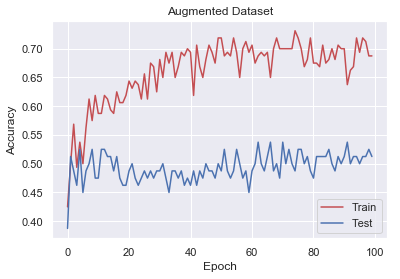

In [10]:
plt.plot(acc_list_train, color='r')
plt.plot(acc_list_test, color='b')
plt.title('Augmented Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')

A comparison to the graphs plotting using the 3D histogram features (below left) shows the accuracy of the test set to be in the region of 20% - 30% throughout the 100 epoch used to train the model. However, using the augmented dataset that has twice the number of samples, we see that the accuracy of the test set to cross the 50% mark and stablize. This shows that the increase in the number of training samples due help the model to learn the feature better and be able to generalize to unseen images. The web data obtained are not very similar to our original images as the new images contains other features in the background of the images. This might lead to the model learning these background features which is noise to the model. However, as we used the 3D histogram features, it considers the distribution of the red, blue and green intensity, and thus it might be resistant to the noise provided by the background. 

Another point to note is that the train accuracy of the augmented data does not approach to 100% but fluctutes around 70%. This can be explained by the difference in the type of data we have in the augmented dataset and the model is having a hard time trying to fit both the original data and the data retrieved from Google image search.

<td><img width="800px" src="img/q4.png"></td>